In [1]:
import dmdd
import numpy as np
%matplotlib inline


In [2]:
print dmdd.dRdQ_AM(sigma_si = 75.5)
# MATCHES for same parameters as rate_UV.dRdQ, since at t = 0 there is no velocity and vlag_mean is the same
print dmdd.dRdQ_AM(sigma_si = 75.5, time = 365)
# good, time 365 = time 0


[  2.80527965e-17]
[  2.80527965e-17]


In [3]:
print dmdd.rate_UV.dRdQ(Q = np.array([100.]), sigma_si = 75.5)

[  2.80527965e-17]


In [4]:
print dmdd.dRdQ_AM(sigma_si = 75.5, time = 50)
print dmdd.dRdQ_AM(sigma_si = 75.5, time = 100)
print dmdd.dRdQ_AM(sigma_si = 75.5, time = 150)
print dmdd.dRdQ_AM(sigma_si = 75.5, time = 200)
print dmdd.dRdQ_AM(sigma_si = 75.5, time = 250)
print dmdd.dRdQ_AM(sigma_si = 75.5, time = 300)
print dmdd.dRdQ_AM(sigma_si = 75.5, time = 350)

[  4.82670411e-17]
[  5.60804697e-17]
[  4.13587574e-17]
[  2.21276375e-17]
[  1.26696223e-17]
[  1.28934420e-17]
[  2.28944209e-17]


In [5]:
dmdd.integral(1., 100., 0., 365., sigma_si = 75.5)

2.9231845333250124e-06

In [6]:
def funct1(Q,time, sigma_si, sigma_anapole, mass, element, v_amplitude):
    return (Q**2)*(time)
#have to define like this due to the way integral is defined, but still returns correct answer

In [7]:
dmdd.integral(0, 1, 0, 1, function = funct1)

0.16675008341675007

In [8]:
# integral will also need to be able to take the element, mass, et cetera of the particles as will dRdQ_AM..... 
# unless there's a slick way to assign those values, which there may be before the thing
# for some reason integral can't take Qmin = 0. as a value

In [9]:
 dmdd.rate_UV.dRdQ(Q = np.asarray([0.]), v_lag = 220., mass = 50., sigma_si = 75.5)

array([  8.63651332e-10])

In [2]:
# Testing the object Experiment
# Pass efficiency function
xe = dmdd.Experiment('1xe', 'xenon', 5, 100, 2000, dmdd.eff.efficiency_unit)

print 'experiment: {} ({:.0f} kg-yr)'.format(xe.name, xe.exposure)

# The minimum detectable WIMP mass (head-on collision, transfers all of momentum)
# With AM the v_lag will be changing with time
minimum_mx = xe.find_min_mass(v_esc=540., v_lag=220., mx_guess=1.) 
print 'minimum detectable WIMP mass: {:.1f} GeV'.format(minimum_mx)

# The exclusion curve or maximum exclusion at 50 GeV (mass), assuming 4 background events (Nbackground)
sigma_exp = xe.sigma_limit(sigma_name='sigma_si', fnfp_name='fnfp_si', fnfp_val=-1.1,
                                mass=50, Nbackground=4, sigma_guess = 1e10, mx_guess=1.,
                                v_esc=540., v_lag=220., v_rms=220., rho_x=0.3)
anapole_exp = xe.sigma_limit(sigma_name='sigma_anapole', fnfp_name='fnfp_anapole', fnfp_val=-1.1,
                            mass=50, Nbackground=4, sigma_guess=1e10, mx_guess=1.,
                            v_esc=540., v_lag=220., v_rms=220., rho_x=0.3)

sigma_normalized = sigma_exp * dmdd.PAR_NORMS['sigma_si']
anapole_normalized = anapole_exp * dmdd.PAR_NORMS['sigma_anapole']

print 'projected exclusion for SI scattering @ 50 GeV: sigma_p = {:.2e} cm^2'.format(sigma_normalized)
print 'projected exclusion for Anapole scattering @ 50 GeV: sigma_p = {:.2e} cm^2'.format(anapole_normalized)


experiment: 1xe (2000 kg-yr)
minimum detectable WIMP mass: 7.3 GeV
projected exclusion for SI scattering @ 50 GeV: sigma_p = 1.93e-46 cm^2
projected exclusion for Anapole scattering @ 50 GeV: sigma_p = 5.28e-41 cm^2


In [3]:
# shortcut for scattering models corresponding to rates coded in rate_UV:
anapole_model = dmdd.UV_Model('Anapole', ['mass','sigma_anapole'])
SI_model = dmdd.UV_Model('SI', ['mass','sigma_si'])

print 'model: {}, parameters: {}.'.format(anapole_model.name, anapole_model.param_names)
print 'model: {}, parameters: {}.'.format(SI_model.name, SI_model.param_names)

model: Anapole, parameters: ['mass', 'sigma_anapole'].
model: SI, parameters: ['mass', 'sigma_si'].


simulation had 161 events (expected 152).
simulation had 160 events (expected 161).


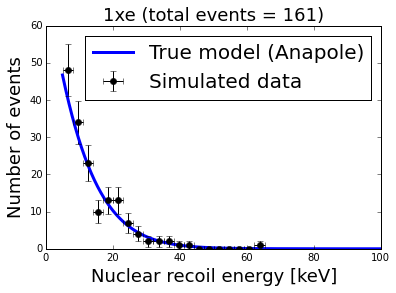

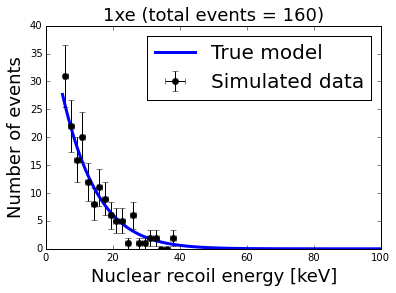

In [4]:
# intialize an Experiment with XENON target, to be passed to Simulation:
# (this is the same as the experiment test above)
xe = dmdd.Experiment('1xe', 'xenon', 5, 100, 1000, dmdd.eff.efficiency_unit, energy_resolution=True)


# initialize a simulation with xe, for SI and Anapole models defined above,
# for 50 GeV WIMP, for sigma_si = 70*PAR_NORMS['sigma_si'] and PAR_NORMS['sigma_anapole'] 
test_A = dmdd.Simulation('xesim_anapole', xe, anapole_model, {'mass':50.,'sigma_anapole':40.})

test_si = dmdd.Simulation('xesim_si', xe, SI_model, {'mass':50.,'sigma_si':72.})


dmdd.Simulation.plot_data(test_A)
dmdd.Simulation.plot_data(test_si)



In [5]:
xe = dmdd.Simulation_AM('AM_xenon', xe, SI_model, {'mass':50.,'sigma_si':75.5}, Qmin = 5, Qmax = 100,
                       Tmin = 0, Tmax = 365, sigma_si = 75.5, element = 'xenon')



""" dRdQ_AM(mass = 50., sigma = 75.5, Q = 100.,
            time = 0, bins = 50,
            vlag_mean = 220., v_amplitude = 30.)"""

Simulation data and/or pickle file does not exist. Forcing simulation.




ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()